In [2]:
print("Hi Jon")

Hi Jon


Stroke 1 attempt 1: Stroke lacks sufficient contrast. Consider a darker color or thicker stroke.
Reattempting stroke with modifications...
Stroke 1 attempt 2: Stroke lacks sufficient contrast. Consider a darker color or thicker stroke.
Reattempting stroke with modifications...
Stroke 1 attempt 3: Stroke lacks sufficient contrast. Consider a darker color or thicker stroke.
Reattempting stroke with modifications...
Stroke 1 attempt 4: Stroke lacks sufficient contrast. Consider a darker color or thicker stroke.
Reattempting stroke with modifications...
Stroke 1 attempt 5: Stroke lacks sufficient contrast. Consider a darker color or thicker stroke.
Reattempting stroke with modifications...
Stroke 1 attempt 6: Stroke is valid.
Stroke 2 attempt 7: Stroke is valid.
Stroke 3 attempt 8: Stroke is valid.
Stroke 4 attempt 9: Stroke is valid.
Stroke 5 attempt 10: Stroke is valid.
Stroke 6 attempt 11: Stroke is valid.
Stroke 7 attempt 12: Stroke is valid.
Stroke 8 attempt 13: Stroke is valid.
Strok

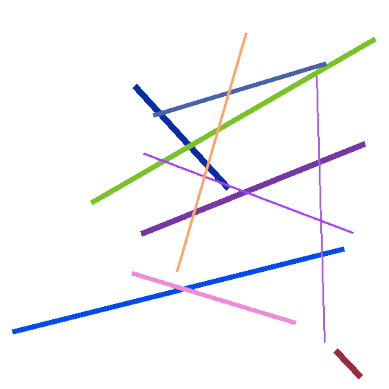

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def generate_stroke_layer(image_size=(512, 512)):
    """
    Create a blank layer for storing stroke information.
    Returns a transparent RGBA image and its drawing context.
    """
    layer = Image.new('RGBA', image_size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(layer)
    return layer, draw

def apply_stroke(draw, start_pos, end_pos, color=(0, 0, 0, 255), width=5):
    """
    Apply a stroke between start_pos and end_pos with given attributes.
    """
    draw.line([start_pos, end_pos], fill=color, width=width)
    return draw

def validate_stroke(stroke_layer):
    """
    Check whether stroke properties meet artistic principles (e.g., smoothness, proportion).
    In this implementation, the stroke's contrast is measured by converting the image to grayscale and
    calculating the pixel intensity standard deviation.
    """
    # Convert to grayscale for contrast measurement
    grayscale = stroke_layer.convert("L")
    arr = np.array(grayscale)
    contrast = np.std(arr)
    
    # Threshold determined experimentally; adjust as needed.
    if contrast < 15:
        return False, "Stroke lacks sufficient contrast. Consider a darker color or thicker stroke."
    return True, "Stroke is valid."

def train_AI(max_strokes=10):
    """
    Iteratively refine strokes and learn from feedback.
    For each stroke, random stroke parameters are generated.
    If the stroke validation fails, a reattempt is made with new parameters.
    """
    canvas, draw = generate_stroke_layer()
    attempts = 0
    stroke_count = 0
    
    while stroke_count < max_strokes and attempts < max_strokes * 3:
        # Randomly generate stroke parameters
        start = (np.random.randint(0, canvas.width), np.random.randint(0, canvas.height))
        end = (np.random.randint(0, canvas.width), np.random.randint(0, canvas.height))
        color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256), 255)
        width = np.random.randint(3, 10)
        
        # Apply stroke on a temporary canvas to check validity
        temp_canvas = canvas.copy()
        temp_draw = ImageDraw.Draw(temp_canvas)
        apply_stroke(temp_draw, start, end, color=color, width=width)
        
        is_valid, feedback = validate_stroke(temp_canvas)
        print(f"Stroke {stroke_count+1} attempt {attempts+1}: {feedback}")
        
        if is_valid:
            # Commit the valid stroke to the main canvas
            apply_stroke(draw, start, end, color=color, width=width)
            stroke_count += 1
        else:
            print("Reattempting stroke with modifications...")
        attempts += 1
    
    return canvas

# Display the final result
final_image = train_AI()
plt.imshow(final_image)
plt.axis('off')
plt.show()